# IWalk 2023 Survey Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats

#Separately copy the worksheet with survey data into a new workbook 
file_path = ("/Users/tanvitilloo/Desktop/SF Civic Tech/2023 Survey Data for SFCT - deidentified.xlsx")

iwalk_survey_raw = pd.read_excel(file_path)
iwalk_survey_raw.info
iwalk_survey_raw.head(8) #View the first 8 responses in the dataset 



,Start Date,End Date,IP Address,Respondent ID,"Did you use the Where to Walk feature in the app to find a local park, open space, or trail?",Why not? (Select all that apply),,.1,.2,.3,...,What healthy lifestyle changes did you make?,How did you find out about the Intentional Walk program? (select all that apply),.19,.20,.21,.22,.23,Would you participate in this program again?,Why not?.2,Is there anything you would change about the Intentional Walk app?
0,,,,NaN,Response,I already have walking routes,"I am already familiar with local parks, open s...",I did not see this feature in the app,"I use another method to find local parks, open...",Other (please explain),...,Open-Ended Response,WIC,Rec and Park flyer or newsletter,Info table at Heart of the City Farmers' Market,Info table at Rec and Park Zumba class,"A friend, family member, or colleague",Other (please explain),Response,Open-Ended Response,Open-Ended Response
1,2023-09-15 10:07:39,2023-09-15 10:13:07,172.58.88.154,NaN,No,I already have walking routes,NaN,NaN,NaN,NaN,...,NaN,WIC,NaN,NaN,NaN,NaN,NaN,Yes,NaN,More Reminders to walk
2,2023-09-14 20:49:36,2023-09-14 21:24:52,174.160.120.204,NaN,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,WIC,NaN,NaN,NaN,NaN,NaN,Yes,NaN,no
3,2023-09-14 16:17:11,2023-09-14 16:22:09,76.210.5.151,NaN,Yes,NaN,NaN,NaN,NaN,NaN,...,Usar menos el car,WIC,NaN,Info table at Heart of the City Farmers' Market,Info table at Rec and Park Zumba class,"A friend, family member, or colleague",NaN,Yes,NaN,Todo muy bien
4,2023-09-14 15:35:56,2023-09-14 15:47:23,98.234.89.140,NaN,No,NaN,"I am already familiar with local parks, open s...",I did not see this feature in the app,NaN,NaN,...,Eating more veggies,NaN,NaN,NaN,NaN,"A friend, family member, or colleague",NaN,Yes,NaN,"No, I think it’s perfect just the way it is an..."
5,2023-09-14 14:28:01,2023-09-14 14:30:41,12.33.185.244,NaN,Yes,NaN,NaN,NaN,NaN,NaN,...,Life,WIC,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No
6,2023-09-14 14:11:01,2023-09-14 14:17:19,71.198.118.39,NaN,No,I already have walking routes,"I am already familiar with local parks, open s...",I did not see this feature in the app,"I use another method to find local parks, open...",NaN,...,NaN,NaN,NaN,NaN,NaN,"A friend, family member, or colleague",NaN,Yes,NaN,"Yes. On the Top Walkers leaderboard, I wanted ..."
7,2023-09-14 11:18:55,2023-09-14 11:24:23,98.234.242.211,NaN,No,NaN,NaN,NaN,"I use another method to find local parks, open...",NaN,...,Make more friends,WIC,Rec and Park flyer or newsletter,NaN,NaN,NaN,NaN,Yes,NaN,No


In [52]:
iwalk_survey_raw.tail(15) #View the last 15 observations in the dataset

,Start Date,End Date,Name,Email used to register for the Intentional Walk app,"Did you use the Where to Walk feature in the app to find a local park, open space, or trail?",Why not? (Select all that apply),,.1,.2,.3,...,What healthy lifestyle changes did you make?,How did you find out about the Intentional Walk program? (select all that apply),.19,.20,.21,.22,.23,Would you participate in this program again?,Why not?.2,Is there anything you would change about the Intentional Walk app?
119,2023-09-01 10:29:42,2023-09-01 10:31:25,amy wu,melody168huang@gmail.com,是,NaN,NaN,NaN,NaN,NaN,...,早睡,WIC,NaN,NaN,NaN,NaN,NaN,是,NaN,NaN
120,2023-09-14 20:22:49,2023-09-14 20:28:06,Rosa Marroquín,rosa.isella1@icloud.com.mx,Sí,NaN,NaN,NaN,NaN,NaN,...,Comer más saludable,WIC,NaN,NaN,NaN,NaN,NaN,Sí,NaN,No
121,2023-09-14 10:36:36,2023-09-14 10:41:29,Michelle,Michell.260517@hotmail.com,Sí,NaN,NaN,NaN,NaN,NaN,...,"Levantarme más temprano, tomar mas agua",WIC,NaN,NaN,NaN,NaN,NaN,Sí,NaN,Más lugares para ganar
122,2023-09-14 08:26:59,2023-09-14 08:30:58,Juan,jhonystar8954@gmail.com,Sí,NaN,NaN,NaN,NaN,NaN,...,Todos,WIC,Folleto o boletín de recreación y parque,NaN,Mesa de información en la clase Rec y Park Zumba,NaN,NaN,Sí,NaN,Sigue cumplir caminata y correr
123,2023-09-08 21:51:03,2023-09-08 21:51:53,Mariela perez lopez,Perezlopezmariela845@gmail.com,Sí,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,2023-09-08 14:07:43,2023-09-08 14:19:21,Aracely Guevara,aracelygvr@yahoo.com,No,Ya tengo rutas para caminar,"Ya estoy familiarizado con los parques, espaci...",NaN,NaN,NaN,...,Beber más agua y comer menos dulces.,NaN,NaN,NaN,Mesa de información en la clase Rec y Park Zumba,NaN,NaN,Sí,NaN,Hacerla más sencilla para personas que no mane...
125,2023-09-08 11:03:12,2023-09-08 11:09:00,Estela,ramosestela117@gmail.om,Sí,NaN,NaN,NaN,NaN,NaN,...,Súper bien,WIC,NaN,NaN,NaN,NaN,NaN,Sí,NaN,Todo bien
126,2023-09-08 10:49:12,2023-09-08 10:55:41,Maritza Ocampo,Chiquis17.mo@gmail.com,No,NaN,NaN,NaN,Utilizo otro método para encontrar parques loc...,NaN,...,Comer mas frutas y verduras y menos comida rapida,WIC,NaN,NaN,NaN,NaN,NaN,Sí,NaN,Seleccionar las mujeres embarazadas a otro gru...
127,2023-09-01 13:01:17,2023-09-01 13:06:09,Yessica,Jessica94valle@icloud.com,No,NaN,NaN,NaN,Utilizo otro método para encontrar parques loc...,NaN,...,Tener una rutina más,WIC,NaN,NaN,NaN,NaN,NaN,Sí,NaN,No
128,2023-09-01 12:44:18,2023-09-01 12:48:11,Iris Sanchez,Sancheziris433@gmail.com,Sí,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [55]:
headers = iwalk_survey_raw.loc(0) #saving the values in the first row of the dataset
iwalk_survey_raw= iwalk_survey_raw.drop(0) #drop first row 

#Drop irrelevant columns  
to_drop = ['Respondent ID',
            'Collector ID',
            'IP Address',
            'Email Address', #is empty
            'First Name',#is empty
            'Last Name', #is empty
            'Custom Data 1'] #is empty   ]
iwalk_survey_raw.drop(to_drop, inplace=True, axis = 1)

#Collect respondent info in a separate df
respondent_df = iwalk_survey_raw.iloc[:,0:4] 


In [56]:
# subset the dataset to start from Q3 of the survey
survey_df = iwalk_survey_raw.iloc[:, 4:]
colnames = survey_df.columns.tolist() #stores column names in string form

In [57]:
#collect open-ended questions in a separate df 
open_ended_q = ['Why not?', 
                'Why not?.1',
                'Besides SF Giants tickets, what other prizes would motivate you to keep walking during the program? (e.g. grocery gift card, a pair of walking shoes, exercise equipment, etc.)',
                'What healthy lifestyle changes did you make?',
                'Why not?.2', 
                'Is there anything you would change about the Intentional Walk app?']

open_ended_df = survey_df.reindex(columns = open_ended_q)

In [12]:
#only keep the questions with categorical answers 
survey_df.drop(open_ended_q, inplace = True, axis = 1)
survey_df.isnull().sum()

Did you use the Where to Walk feature in the app to find a local park, open space, or trail?             0
Why not? (Select all that apply)                                                                       106
                                                                                                       103
 .1                                                                                                    129
 .2                                                                                                    123
 .3                                                                                                    130
Did you walk at a local park, open space, or trail during the Intentional Walk program?                  2
Before the program, how many days a week did you walk for exercise?                                      3
On average, how many days a week during the program did friends and/or family walk with you?             3
During the last week of the program, 

### Data Analysis for Q1

In [35]:
survey_df.columns.get_loc('Did you use the Where to Walk feature in the app to find a local park, open space, or trail?')
q1_df = survey_df.iloc[:,0]
q1_df.head(9)
q1_df.isnull().sum()
summary_df1 = q1_df.value_counts().rename_axis('Survey Options').reset_index(name = 'Counts')
total_counts = summary_df1['Counts'].sum()
summary_df1.loc[len(summary_df1)] = ['Total', total_counts]
display(summary_df1)

,Survey Options,Counts
0,Yes,56
1,No,42
2,是,15
3,Sí,11
4,否,9
5,Total,133


Text(0.5, 1.0, 'Did you use the Where to Walk feature in the app to find a local park, open space, or trail?')

/Applications/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21542 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26159 missing from current font.
  font.set_text(s, 0, flags=flags)
/Applications/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21542 missing from current font.
  font.set_text(s, 0, flags=flags)


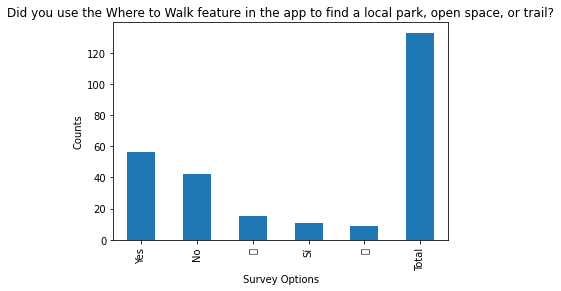

In [48]:
summary_df1.plot(kind = 'bar', x = 'Survey Options', y ='Counts', legend = False)
plt.ylabel('Counts')
plt.title('Did you use the Where to Walk feature in the app to find a local park, open space, or trail?')

### Data Analysis for Q2

In [45]:
survey_df.columns.get_loc('Did you walk at a local park, open space, or trail during the Intentional Walk program?')
q2_df = survey_df.iloc[:,6]
q2_df.head(9)
q2_df.isnull().sum()

2

In [47]:
summary_df2 = q2_df.value_counts().rename_axis('Survey Options').reset_index(name = 'Counts')
total_counts = summary_df2['Counts'].sum()
summary_df2.loc[len(summary_df2)] = ['Total', total_counts]
display(summary_df2)


,Survey Options,Counts
0,Yes,85
1,是,23
2,Sí,11
3,No,11
4,否,1
5,Total,131


Text(0.5, 1.0, 'Did you walk at a local park, open space, or trail during the Intentional Walk program?')

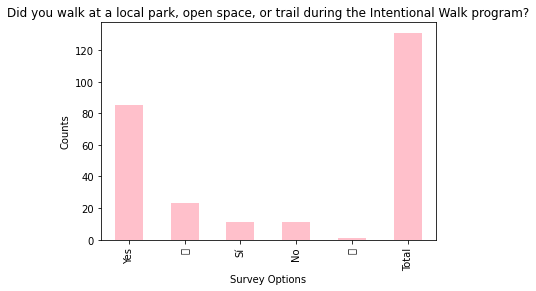

In [50]:
summary_df2.plot(kind = 'bar', x = 'Survey Options', y ='Counts', legend = False,color = "pink")
plt.ylabel('Counts')
plt.title('Did you walk at a local park, open space, or trail during the Intentional Walk program?')

### Data Analysis for Q17

In [74]:
original_column_name17 = 'Which of the following options would make you walk more during the program? (Select all that apply)'
q17_index = survey_df.columns.get_loc(original_column_name17)

q17_df = survey_df.iloc[:, [q17_index + i for i in range(6)]]
q17_df.head(9)
new_col_names_q17 = ['More ideas for where to walk in the app', 'Reminders/prompts to walk', 
                     'Quick tips for easy ways to walk more', 'Quick facts about the health benefits of walking',
                     'Earning awards/medals in the app', 'Other (please explain):']
q17_df.columns = new_col_names_q17
q17_df.isnull().sum().reset_index(name= 'Counts')

,index,Counts
0,More ideas for where to walk in the app,90
1,Reminders/prompts to walk,64
2,Quick tips for easy ways to walk more,94
3,Quick facts about the health benefits of walking,84
4,Earning awards/medals in the app,80
5,Other (please explain):,126


In [77]:
option_counts= {}

for col in new_col_names_q17:
    option_counts[col] = q17_df[col].count()
    
    option_counts_df = pd.DataFrame.from_dict(option_counts, orient='index', columns=['Counts'])
    
    option_counts_df.reset_index(inplace=True)
option_counts_df.rename(columns={'index': 'Survey Option'}, inplace=True)

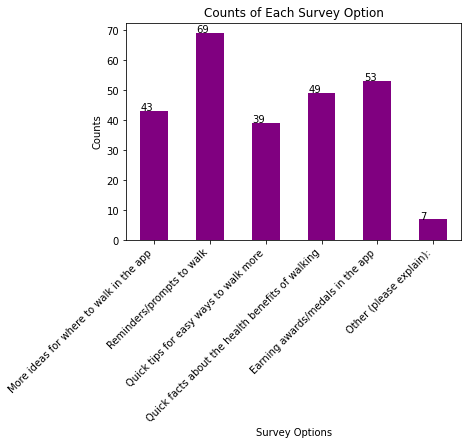

                                      Survey Option  Counts
0           More ideas for where to walk in the app      43
1                         Reminders/prompts to walk      69
2             Quick tips for easy ways to walk more      39
3  Quick facts about the health benefits of walking      49
4                  Earning awards/medals in the app      53
5                           Other (please explain):       7


In [78]:
ax = option_counts_df.plot(kind='bar', x='Survey Option', y='Counts', legend=False, color='purple')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Set x-axis labels to the text in the "Survey Option" column
ax.set_xticklabels(option_counts_df['Survey Option'], rotation=45, ha='right')

# Add labels and title
plt.xlabel('Survey Options')
plt.ylabel('Counts')
plt.title('Counts of Each Survey Option')

# Show the plot
#plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

# Print the option counts DataFrame
print(option_counts_df)


### Data Analysis for Q21

In [22]:
survey_df.columns.get_loc('Did participating in the program lead to you making any other healthy lifestyle changes?')

34

In [23]:
q21_df = survey_df.iloc[:, 34]
q21_df.head(8)

1     No
2     No
3    Yes
4    Yes
5    Yes
6     No
7    Yes
8    Yes
Name: Did participating in the program lead to you making any other healthy lifestyle changes?, dtype: object

In [38]:
q21_df.tail(38)

96       是
97     NaN
98       是
99       是
100    NaN
101      否
102      是
103      是
104      是
105      是
106      是
107      是
108      是
109      是
110      是
111      是
112      是
113      是
114      是
115      是
116      是
117      是
118      是
119      是
120     Sí
121     Sí
122     Sí
123    NaN
124     Sí
125     Sí
126     Sí
127     Sí
128    NaN
129     Sí
130    NaN
131     Sí
132     Sí
133     Sí
Name: Did participating in the program lead to you making any other healthy lifestyle changes?, dtype: object

In [25]:
q21_df.isnull().sum()

11

In [37]:
q21_df.dropna() #we will drop missing values
summary_df21 = q21_df.value_counts().rename_axis('Survey Options').reset_index(name = 'Counts')
total_counts = summary_df21['Counts'].sum()
summary_df21.loc[len(summary_df21)] = ['Total', total_counts]
display(summary_df21)

,Survey Options,Counts
0,Yes,63
1,No,26
2,是,21
3,Sí,11
4,否,1
5,Total,122


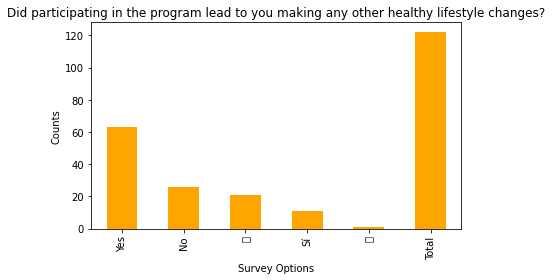

In [43]:
summary_df21.plot(kind = 'bar', x = 'Survey Options', y ='Counts', legend = False, color = 'orange', xlabel = None)
plt.ylabel('Counts')
plt.title('Did participating in the program lead to you making any other healthy lifestyle changes?')
plt.tight_layout()
plt.show()